The dataset *Fatal police shootings* details the fatal shootings from law enforcement whether the victim was unarmed/armed, fleeing/not fleeing, mentally ill, etc. My target variable is the status of whether these victims were armed or unarmed. Based on the target variable, I am trying to predict whether or not these fatal shootings are more prevalent in individuals who are armed or unarmed. I predict shootings are more prevalent in armed victims.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

df = pd.read_csv("fatal-police-shootings-data.csv")

In [2]:
df

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-1.231216e+02,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-1.228917e+02,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-9.728055e+01,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-1.224220e+02,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-1.046923e+02,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,9473,2023-08-22,shoot,not,gun,Canton,Madison,MS,32.506799,-9.007175e+15,intersection,Ladarrius Johnson,24.0,male,B,public_record,False,False,2211
8723,9474,2023-08-23,threat,foot,gun,Aurora,Adams,CO,39.740200,-1.048658e+02,intersection,NaN,NaN,male,NaN,NaN,False,True,21
8724,9476,2023-08-25,NaN,NaN,undetermined,Charlotte,Mecklenburg,NC,35.339644,-8.085310e+01,block,NaN,NaN,male,NaN,NaN,False,False,354
8725,9478,2023-08-27,threat,NaN,knife,Jersey City,Hudson,NJ,40.712567,-7.406971e+01,intersection,Andrew Jerome Washington,52.0,male,NaN,NaN,True,True,1321


In [3]:
df.isnull().sum()

id                               0
date                             0
threat_type                     40
flee_status                   1177
armed_with                     210
city                            54
county                        4856
state                            0
latitude                       980
longitude                      980
location_precision             980
name                           574
age                            602
gender                          47
race                          1395
race_source                   1373
was_mental_illness_related       0
body_camera                      0
agency_ids                       2
dtype: int64

In [4]:
new_df = df.dropna()

In [5]:
new_df.isnull().sum()

id                            0
date                          0
threat_type                   0
flee_status                   0
armed_with                    0
city                          0
county                        0
state                         0
latitude                      0
longitude                     0
location_precision            0
name                          0
age                           0
gender                        0
race                          0
race_source                   0
was_mental_illness_related    0
body_camera                   0
agency_ids                    0
dtype: int64

In [6]:
new_df

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-1.231216e+02,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-1.228917e+02,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-9.728055e+01,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-1.224220e+02,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-1.046923e+02,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,9423,2023-08-06,shoot,car,gun,Gates,Monroe,NY,43.159668,-7.773240e+01,poi_large,Daniel R. Legler,36.0,male,W,public_record,False,True,1234
8700,9452,2023-08-11,threat,foot,gun,Chicago,Cook,IL,41.692271,-8.764987e+01,block,Louis C. Gordon-Hay,36.0,male,B,public_record,False,False,265
8706,9445,2023-08-13,threat,foot,gun,Hickory,Catawba,NC,35.725807,-8.135042e+01,block,Timothy Craig Setzer Jr.,27.0,male,W,public_record,False,False,1641
8713,9463,2023-08-15,shoot,not,gun,Jeffersonville,Clark,IN,38.270650,-8.574862e+01,address,Richard Glass,65.0,male,W,public_record,False,False,14271


In [7]:
df1 = new_df.drop(new_df[new_df.armed_with.isin(['other;gun','undetermined', 'other', 'unknown'])].index)
df_new1 = df1.drop(df1[df1.race.isin(['O','N'])].index)

In [8]:
df_new1

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-1.231216e+02,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-1.228917e+02,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-9.728055e+01,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-1.224220e+02,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
5,11,2015-01-04,attack,not,gun,Guthrie,Logan,OK,35.876991,-9.742345e+01,not_available,Kenneth Joe Brown,18.0,male,W,not_available,False,False,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,9423,2023-08-06,shoot,car,gun,Gates,Monroe,NY,43.159668,-7.773240e+01,poi_large,Daniel R. Legler,36.0,male,W,public_record,False,True,1234
8700,9452,2023-08-11,threat,foot,gun,Chicago,Cook,IL,41.692271,-8.764987e+01,block,Louis C. Gordon-Hay,36.0,male,B,public_record,False,False,265
8706,9445,2023-08-13,threat,foot,gun,Hickory,Catawba,NC,35.725807,-8.135042e+01,block,Timothy Craig Setzer Jr.,27.0,male,W,public_record,False,False,1641
8713,9463,2023-08-15,shoot,not,gun,Jeffersonville,Clark,IN,38.270650,-8.574862e+01,address,Richard Glass,65.0,male,W,public_record,False,False,14271


In [9]:
#Anything other than the victim being unarmed is classified as armed.
df_new1.replace('unarmed', 0, inplace = True)
df_new1.replace(['gun', 'replica','knife', 'vehicle', 'blunt_object', 'blunt_object;blunt_object', 'gun;knife', 'knife;blunt_object', 'vehicle;gun', 'gun;vehicle'], 1, inplace = True)

In [10]:
df_new1['armed_with'].value_counts()

1    2429
0     240
Name: armed_with, dtype: int64

In [11]:
df_new1

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,1,Shelton,Mason,WA,47.246826,-1.231216e+02,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,1,Aloha,Washington,OR,45.487421,-1.228917e+02,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,0,Wichita,Sedgwick,KS,37.694766,-9.728055e+01,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,1,San Francisco,San Francisco,CA,37.762910,-1.224220e+02,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
5,11,2015-01-04,attack,not,1,Guthrie,Logan,OK,35.876991,-9.742345e+01,not_available,Kenneth Joe Brown,18.0,male,W,not_available,False,False,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,9423,2023-08-06,shoot,car,1,Gates,Monroe,NY,43.159668,-7.773240e+01,poi_large,Daniel R. Legler,36.0,male,W,public_record,False,True,1234
8700,9452,2023-08-11,threat,foot,1,Chicago,Cook,IL,41.692271,-8.764987e+01,block,Louis C. Gordon-Hay,36.0,male,B,public_record,False,False,265
8706,9445,2023-08-13,threat,foot,1,Hickory,Catawba,NC,35.725807,-8.135042e+01,block,Timothy Craig Setzer Jr.,27.0,male,W,public_record,False,False,1641
8713,9463,2023-08-15,shoot,not,1,Jeffersonville,Clark,IN,38.270650,-8.574862e+01,address,Richard Glass,65.0,male,W,public_record,False,False,14271


In [12]:
df_new1.dtypes

id                              int64
date                           object
threat_type                    object
flee_status                    object
armed_with                      int64
city                           object
county                         object
state                          object
latitude                      float64
longitude                     float64
location_precision             object
name                           object
age                           float64
gender                         object
race                           object
race_source                    object
was_mental_illness_related       bool
body_camera                      bool
agency_ids                     object
dtype: object

In [13]:
cols = df_new1.columns
remove = cols[[0,1,2,5,6,7,8,9,10,11,15,18]]
df_new1.drop(remove, inplace=True, axis=1)

In [14]:
df_new1

,flee_status,armed_with,age,gender,race,was_mental_illness_related,body_camera
0,not,1,53.0,male,A,True,False
1,not,1,47.0,male,W,False,False
2,not,0,23.0,male,H,False,False
3,not,1,32.0,male,W,True,False
5,not,1,18.0,male,W,False,False
...,...,...,...,...,...,...,...
8680,car,1,36.0,male,W,False,True
8700,foot,1,36.0,male,B,False,False
8706,foot,1,27.0,male,W,False,False
8713,not,1,65.0,male,W,False,False


In [15]:
df_1 = df_new1.rename(columns={'armed_with': 'target'})

In [16]:
df_1

,flee_status,target,age,gender,race,was_mental_illness_related,body_camera
0,not,1,53.0,male,A,True,False
1,not,1,47.0,male,W,False,False
2,not,0,23.0,male,H,False,False
3,not,1,32.0,male,W,True,False
5,not,1,18.0,male,W,False,False
...,...,...,...,...,...,...,...
8680,car,1,36.0,male,W,False,True
8700,foot,1,36.0,male,B,False,False
8706,foot,1,27.0,male,W,False,False
8713,not,1,65.0,male,W,False,False


In [17]:
df_1.dtypes

flee_status                    object
target                          int64
age                           float64
gender                         object
race                           object
was_mental_illness_related       bool
body_camera                      bool
dtype: object

In [18]:
df_1.replace('not', 0, inplace = True)
df_1.replace('car', 1, inplace = True)
df_1.replace('foot', 2, inplace = True)
df_1.replace('other', 3, inplace = True)

df_1.replace('male', 0, inplace = True)
df_1.replace('female', 1, inplace = True)

df_1.replace('A', 0, inplace = True)
df_1.replace('W', 1, inplace = True)
df_1.replace('H', 2, inplace = True)
df_1.replace('B', 3, inplace = True)

df_1.replace({False: 0, True: 1}, inplace = True)


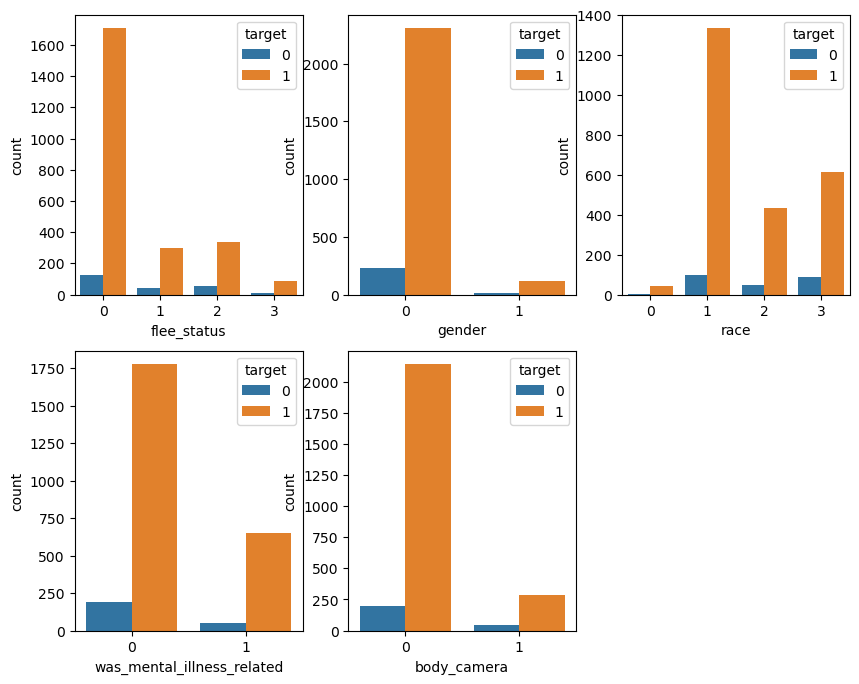

In [19]:
#Categorical features v. Target Barchart
from sklearn.feature_selection import SelectKBest, f_classif, chi2

import seaborn as sns
import matplotlib.pyplot as plt


cat_list=['flee_status','gender', 'race', 'was_mental_illness_related','body_camera']

fig=plt.figure(figsize=(10,8))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,3,i+1)
    chart=sns.countplot(x=column, hue='target', data=df_1)





In [20]:
#Chi Squared test.... Gender and was_mental_illness_related is greater than or equal to .05 showing no significant difference so should be removed
x = df_1.loc[:, ['flee_status','gender', 'race', 'was_mental_illness_related','body_camera']]
y = df_1.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)

np.set_printoptions(suppress = True)

print(catFeatures.scores_)
print(catFeatures.pvalues_)


[33.532669    0.00452736  9.74493774  3.7756459   8.44351379]
[0.00000001 0.94635432 0.00179817 0.05200382 0.00366348]


In [21]:
df_1.drop(['gender', 'was_mental_illness_related'], inplace = True, axis = 1)

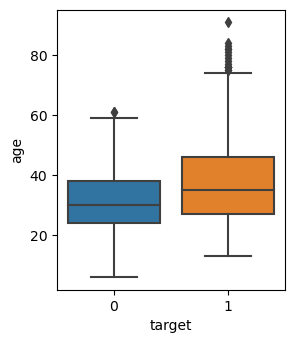

In [22]:
import seaborn as sns

num_list=['age']
fig=plt.figure(figsize=(10, 8))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,3,i+1)
    sns.boxplot(x='target',y=column, data=df_1)


In [23]:
#Anova F test
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = df_1.loc[:, ['age']]
y = df_1.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all') 
bestFeatures = fs.fit(x, y)    
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)    #F scores 
print(bestFeatures.pvalues_)   #p values


[41.01715951]
[0.]


In [24]:
df_withdummies = pd.get_dummies(df_1, columns=['flee_status', 'race'], drop_first=True)

In [25]:
df_withdummies


,target,age,body_camera,flee_status_1,flee_status_2,flee_status_3,race_1,race_2,race_3
0,1,53.0,0,0,0,0,0,0,0
1,1,47.0,0,0,0,0,1,0,0
2,0,23.0,0,0,0,0,0,1,0
3,1,32.0,0,0,0,0,1,0,0
5,1,18.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
8680,1,36.0,1,1,0,0,1,0,0
8700,1,36.0,0,0,1,0,0,0,1
8706,1,27.0,0,0,1,0,1,0,0
8713,1,65.0,0,0,0,0,1,0,0


In [26]:
x = df_withdummies.loc[:, df_withdummies.columns!='target']
y = df_withdummies['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)


In [27]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)


(1868, 8)
(3400, 8)


In [28]:
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())


C:\Users\j4joh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=2000, penalty='none')

In [29]:
test_pred = LogRegression.predict(x_test)
accuracy_score(y_test, test_pred)


0.6666666666666666

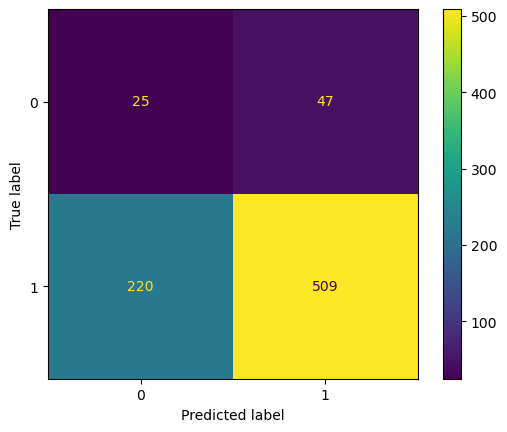

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)
